# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Projeto

### Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set1")
df = pd.read_csv("https://raw.githubusercontent.com/Vlarck/ICD/main/Projeto/datasets/LED.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Limpando e corrigindo colunas
#### O dataset original apresentava espaços nos strings, entao isso foi removido abaixo, além de corrigir a coluna "thinness" em que a faixa etária estudada vai de 10 à 19 anos, e encontrava-se com o string "thinness 1-19"

In [2]:
oldcols = list(df.columns)
newcols = []
for col in oldcols:
    newcols.append(col.strip().replace('  ', ' ')) 
df.columns = newcols
df.rename(columns={'thinness 1-19 years':'thinness 10-19 years'}, inplace=True)

### Checando dados nulos 

In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Substituindo os dados nulos pela médias de suas respectivas colunas

In [4]:
nulos_pela_media = df.fillna(df.mean())
nulos_pela_media

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Verificando a presença de nulos após o tratamento

In [5]:
nulos_pela_media.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Dados anuais, por média global

In [6]:
medias_ao_longo_dos_anos = nulos_pela_media.groupby("Year").mean().reset_index()
medias_ao_longo_dos_anos

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2000,66.750273,181.475410,37.540984,4.570890,473.850781,77.733143,4663.792350,34.467445,53.726776,76.380604,5.593184,73.770340,2.530055,5148.212760,1.016458e+07,5.144150,5.240659,0.518516,10.593595
1,2001,67.128962,175.169399,36.825137,4.555917,516.625910,77.315632,4640.262295,36.159795,52.038251,78.025413,5.607010,76.753947,2.573770,5256.722520,1.065698e+07,4.956172,5.053228,0.566538,11.007256
2,2002,67.351366,171.437158,35.584699,4.660617,476.794487,78.212198,3204.754098,37.123729,50.300546,79.710931,5.693458,78.921575,2.573770,5040.548682,7.964792e+06,5.162729,5.115523,0.571260,11.187038
3,2003,67.433333,169.131148,34.874317,4.690016,494.706547,76.043191,3708.792350,36.460888,48.584699,80.377598,5.829260,78.905181,2.546995,5189.223864,1.072676e+07,4.923385,5.022080,0.575413,11.345508
4,2004,67.646448,186.262295,33.644809,4.752857,772.336156,78.712135,2805.497268,36.591489,47.092896,80.191805,5.860407,79.850536,2.478689,7118.929362,1.595690e+07,4.935407,5.027544,0.586538,11.571737
5,2005,68.209290,167.633880,32.366120,4.843747,823.318110,80.917249,3200.551913,35.637391,45.306011,80.989620,5.921009,81.681138,2.345902,7284.219331,1.707344e+07,5.096609,5.192025,0.598145,11.693049
6,2006,68.667760,170.404372,31.808743,4.915972,828.776319,81.727294,2063.224044,37.542855,44.273224,84.516668,5.702921,82.236744,2.169399,7367.117208,1.479465e+07,5.112456,5.154320,0.632052,11.922011
7,2007,69.036066,159.808743,30.612022,5.011819,954.458468,81.500388,1557.540984,36.992582,42.732240,84.789892,5.636091,84.307782,1.992896,8381.722429,1.727149e+07,5.032674,4.975085,0.638374,12.035672
8,2008,69.427869,174.519126,29.568306,5.004879,1095.802669,83.348684,1523.229508,38.226462,41.322404,85.549455,5.726582,84.843301,1.797268,10143.582379,1.020154e+07,4.906445,4.940659,0.644724,12.166273
9,2009,69.938251,163.393443,28.956284,4.887666,719.827424,83.967147,1522.606557,39.569631,39.770492,85.314482,6.518713,85.045487,1.538798,7122.957498,9.923611e+06,4.787319,4.719894,0.650128,12.293595


In [7]:
medias_ao_longo_dos_anos.columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### BOXPLOTS DE VARIÁVEIS IMPORTANTES

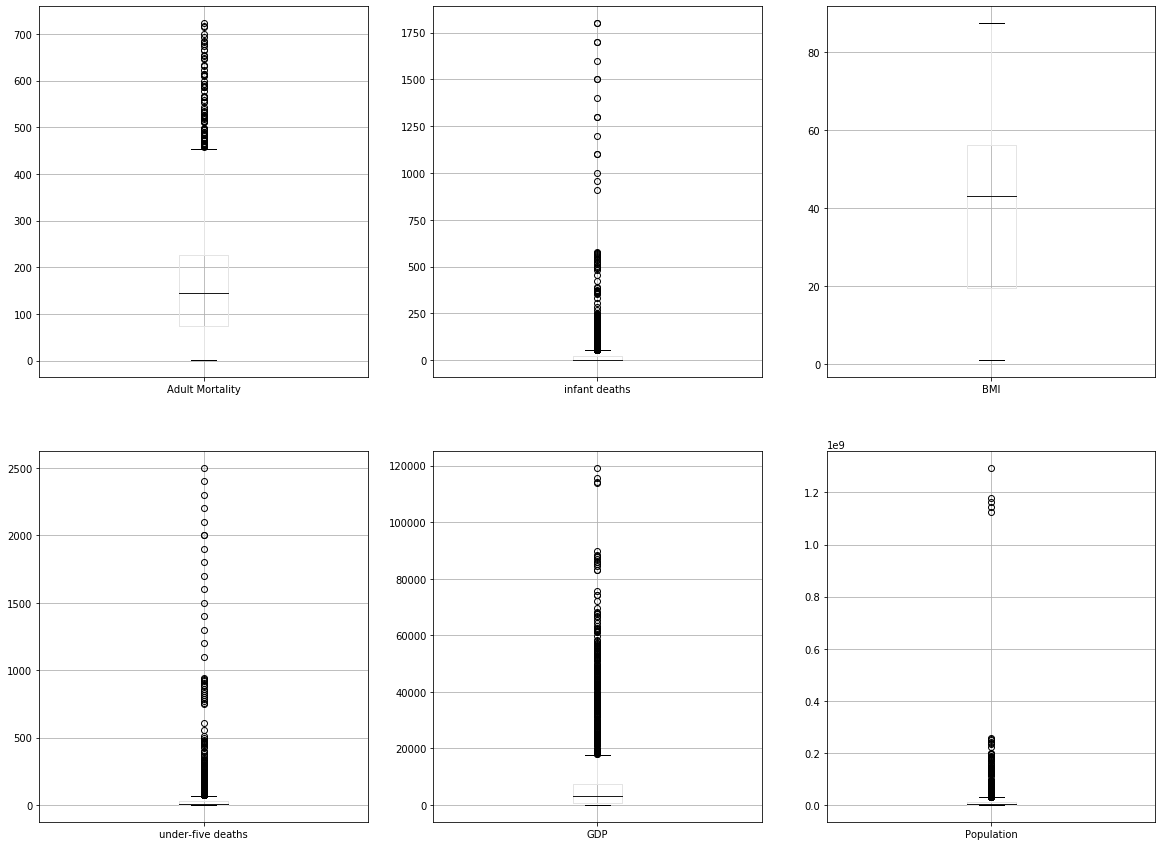

In [8]:
plt.figure(figsize=(20,15))

for i, col in enumerate(['Adult Mortality','infant deaths','BMI','under-five deaths','GDP','Population'], start=1):
    plt.subplot(2, 3, i)
    nulos_pela_media.boxplot(col)

### GRÁFICO DE BARRA
### O gráfico abaixo mostra a diminuição, ao longo dos anos, da média de mortes por HIV/AIDS a cada 1000 crianças entre 0-4 anos.

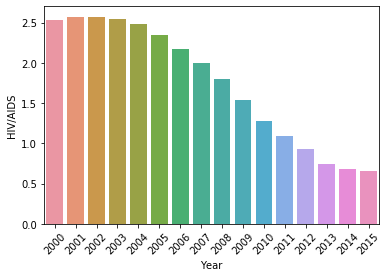

In [9]:
grafico_barras = sns.barplot(data=medias_ao_longo_dos_anos, y="HIV/AIDS", x="Year")
plt.xticks(rotation=45)
plt.show()

### GRÁFICO DE DISPERSÃO

### O gráfico abaixo mostra a forte correlação entre a média de anos que as pessoas passam na escola e o IDH (0-1) dos países

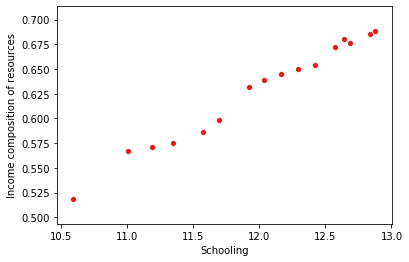

In [10]:
sns.scatterplot(data=medias_ao_longo_dos_anos, y="Income composition of resources", x="Schooling")

### Mapa de correlações

### Mapa que mostra o quão relacionadas estão duas variáveis ( Negativos: para variáveis anticorrelacionadas, 0 para nenhuma relação e 1 para variáveis totalmente relacionadas)

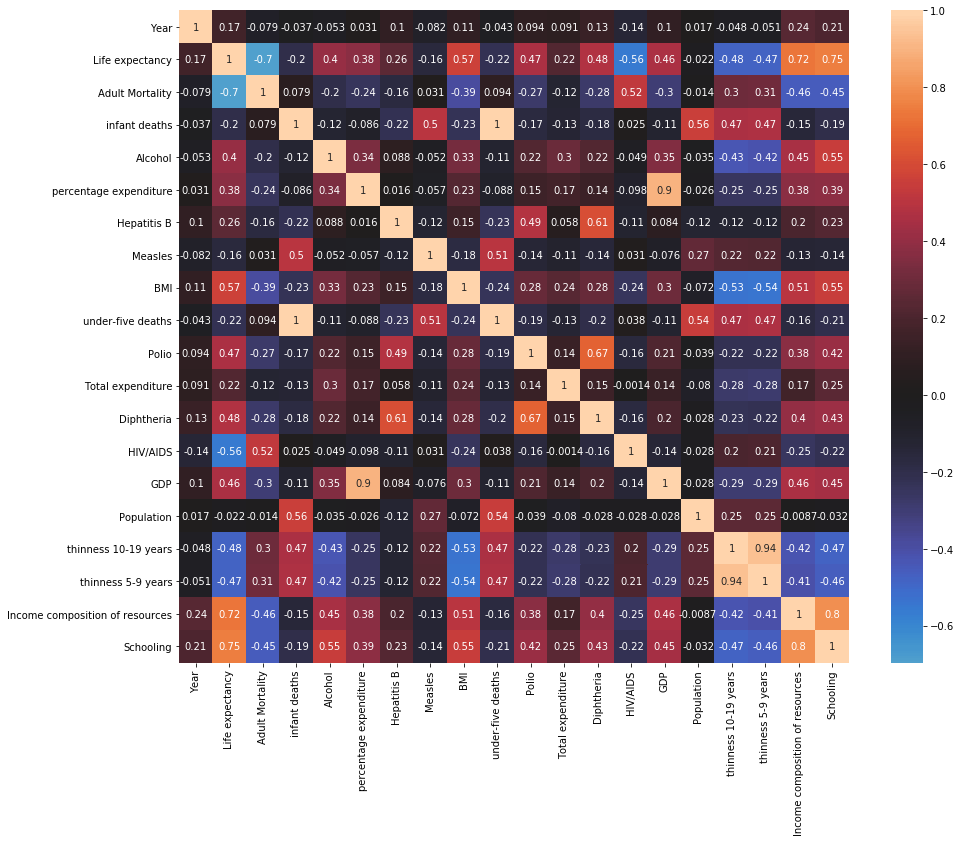

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),center=0,annot=True)

### HISTOGRAMAS UTILIZANDO DADOS DAS DOENÇAS

### Percebe-se que a cobertura de imunização, em porcentagem, é alta (mais de 1.600 vezes essa porcentagem foi entre 90 e 100% nos países do Dataset

(array([1.720e+02, 1.000e+00, 1.000e+01, 2.600e+01, 7.000e+01, 8.500e+01,
        1.510e+02, 2.710e+02, 4.660e+02, 1.686e+03]),
 array([ 3. , 12.6, 22.2, 31.8, 41.4, 51. , 60.6, 70.2, 79.8, 89.4, 99. ]),
 <a list of 10 Patch objects>)

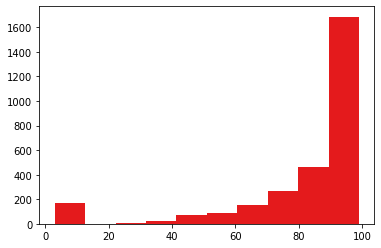

In [12]:
plt.hist(nulos_pela_media['Polio'])

### Na hepatite C, essa cobertura também é alta, com mais de 1.200 vezes a porcentagem entre 90 e 100%, novamente.

(array([ 159.,   16.,   22.,   21.,   56.,   48.,  142.,  202.,  956.,
        1316.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

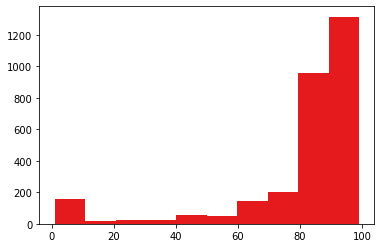

In [13]:
plt.hist(nulos_pela_media['Hepatitis B'])

### GRÁFICO DE LINHA

### É possível observar como a expectativa de vida se alterou globalmente ao longo dos anos

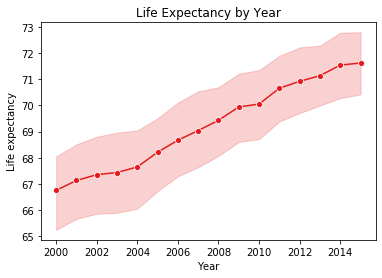

In [14]:
sns.lineplot(x='Year', y='Life expectancy', data=nulos_pela_media, marker='o')
plt.title('Life Expectancy by Year')
plt.show()